In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Part 1

In [148]:
df = pd.read_csv('train.csv')

In [149]:
#replace 0's with 0.1 for B columns (division)
for i in range(12,len(df.columns.values)):
    df[df.columns.values[i]] = df[df.columns.values[i]].replace(0, 0.1)


In [150]:
#difference and divide
c_name  = ['follower_diff', 'following_diff', 'listed_diff', 'mentions_r_diff', ' retweets_r_diff', 'mentions_s_diff', 'retweets_s_diff', 'posts_diff', 'nf1_diff', 'nf2_diff', 'nf3_diff']
c_name2 = ['follower_ratio', 'following_ratio', 'listed_ratio', 'mentions_r_ratio', ' retweets_r_ratio', 'mentions_s_ratio', 'retweets_s_ratio', 'posts_ratio', 'nf1_ratio', 'nf2_ratio', 'nf3_ratio']

for i in range(1,12):
    df[c_name[i-1]] = df[df.columns.values[i]] - df[df.columns.values[i+11]]
    df[c_name2[i-1]] = df[df.columns.values[i]]/df[df.columns.values[i+11]]

In [151]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,retweets_s_diff,retweets_s_ratio,posts_diff,posts_ratio,nf1_diff,nf1_ratio,nf2_diff,nf2_ratio,nf3_diff,nf3_ratio
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,0.003688,5.585569,-0.415091,14.195777,12.830836,2.323081e+03,-0.225186,63.733761,2.039786,1684.775992
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,2.706191,13.770836,26.374714,63.460866,38911.503295,4.493064e+04,147.533418,374.343716,8004.967382,12757.003128
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,-16.190036,0.006169,-192.971915,0.000521,-918957.000000,0.000000e+00,-1816.719697,0.000000,-74409.992424,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,-0.729064,0.279538,-5.491086,0.170097,-671.000000,5.173733e-02,-59.634217,0.235356,-2151.743979,0.337096
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,-0.100000,0.993070,-75.796970,0.948204
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,0.736936,3.629659,5.202471,5.583226,676.000000,2.064909e+01,61.491295,3.929521,2129.051229,2.846665
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,15.933596,137.977004,192.971915,1921.054391,915090.000000,2.137180e+06,1078.000000,8360.000000,142621.361538,445661.428571


In [152]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [153]:
#drop fields with high correlations
df = df.drop(['A_listed_count', 'A_mentions_received', 'A_network_feature_1', 'A_retweets_sent',
              'B_listed_count', 'B_mentions_received', 'B_network_feature_1', 'B_retweets_sent',
              'mentions_s_diff', 'nf1_diff', 'nf1_ratio', 'mentions_r_diff'], axis=1)

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Choice,A_follower_count,A_following_count,A_retweets_received,A_mentions_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_retweets_received,B_mentions_sent,B_posts,B_network_feature_2,B_network_feature_3,follower_diff,follower_ratio,following_diff,following_ratio,listed_diff,listed_ratio,mentions_r_ratio,retweets_r_diff,retweets_r_ratio,mentions_s_ratio,retweets_s_diff,retweets_s_ratio,posts_diff,posts_ratio,nf2_diff,nf2_ratio,nf3_diff,nf3_ratio
Choice,1,0.134133,0.0636783,0.0241391,0.123868,0.107648,0.0739955,0.0845079,-0.161278,-0.0428585,-0.0647744,-0.139521,-0.102028,-0.0513267,-0.0693384,0.227788,0.0625927,0.0747654,0.0370379,0.256865,0.0597453,0.0468954,0.0606592,0.0749291,0.190219,0.21796,0.17,0.149879,0.128133,0.0893134,0.124954,0.10858,0.10531
A_follower_count,0.134133,1,0.115834,0.521888,0.0184562,0.0429928,-0.153272,-0.036082,0.155347,0.033327,0.0307089,-0.0117151,-0.0134523,-0.0339802,-0.014107,0.621475,0.173544,0.0569143,0.00617206,0.558295,0.0492878,0.094744,0.378813,0.181474,0.014925,0.0745453,0.071266,0.0397559,0.0163692,-0.0835497,-0.0361204,-0.016226,-0.0188132
A_following_count,0.0636783,0.115834,1,0.0518189,0.111342,0.138373,0.0436415,0.0977624,-0.00761551,-0.0109439,-0.00177405,0.00679748,-0.000279506,0.00341565,-0.00396783,0.0922985,0.0220434,0.703584,0.107092,0.0912134,0.0482905,0.00659061,0.0407559,0.00216734,0.0378966,-0.0608153,-0.0558756,0.0962737,0.0540161,0.0283157,0.0203711,0.0730481,0.0296298
A_retweets_received,0.0241391,0.521888,0.0518189,1,0.0191297,0.033068,-0.0652662,-0.0403009,0.149532,0.0233395,0.00871862,-0.00720326,-0.00967129,-0.0176765,-0.012855,0.270049,0.0176761,0.0194695,0.00107678,0.50302,0.00154296,0.111792,0.758515,0.169236,0.0321002,0.040046,0.0568998,0.0300808,0.0296789,-0.0332579,-0.0140508,-0.0201233,-0.00897866
A_mentions_sent,0.123868,0.0184562,0.111342,0.0191297,1,0.60704,0.064242,0.035437,-0.00573199,0.027851,0.0106835,0.0167721,0.0190612,0.0163756,0.0140347,0.0182897,0.00944908,0.0576802,0.0397706,0.0462289,0.0501994,0.00714641,0.00765666,0.00759906,0.438717,0.40869,0.424039,0.407409,0.221624,0.0334762,0.00502265,0.0158119,0.0177693
A_posts,0.107648,0.0429928,0.138373,0.033068,0.60704,1,-0.0661254,-0.0183469,-0.0119919,0.0216791,0.00597375,0.0280386,0.02388,0.0108142,0.00469153,0.0415259,0.0203197,0.0808746,0.0143695,0.0481253,0.0213929,0.0282451,0.0213775,0.0518918,0.266572,0.266215,0.272676,0.676678,0.387698,-0.0544662,-0.0190966,-0.0164297,0.00487262
A_network_feature_2,0.0739955,-0.153272,0.0436415,-0.0652662,0.064242,-0.0661254,1,0.520617,-0.0433684,-0.00614985,-0.0170737,-0.0330726,-0.0231239,0.0201159,0.0195407,-0.0797441,-0.0309549,0.0347365,0.0133493,-0.0349442,-0.0115263,-0.0356429,-0.0387496,-0.0650363,0.0494891,-0.011243,-0.0218489,-0.028878,-0.0109392,0.690875,0.255852,0.360968,0.142456
A_network_feature_3,0.0845079,-0.036082,0.0977624,-0.0403009,0.035437,-0.0183469,0.520617,1,-0.00372976,0.00396466,-0.00786778,-0.026988,0.00512403,0.0053931,-0.00755148,-0.0239115,-0.0083967,0.0652062,0.0135032,-0.0206749,-0.0033772,-0.0217898,-0.0256705,-0.0403658,0.0258596,-0.0106533,-0.0253414,-0.0165114,-0.00583275,0.363354,0.120054,0.724427,0.140684
B_follower_count,-0.161278,0.155347,-0.00761551,0.149532,-0.00573199,-0.0119919,-0.0433684,-0.00372976,1,0.206914,0.452106,0.0168338,0.0412679,-0.153278,-0.0408107,-0.677379,-0.0210203,-0.152343,-0.0102748,-0.460821,-0.0196467,-0.0164561,-0.180356,-0.0298273,-0.0162587,-0.0524257,-0.0145846,-0.0387189,-0.0245711,0.0802456,-0.048894,0.0254512,-0.0417989
B_following_count,-0.0428585,0.033327,-0.0109439,0.0233395,0.027851,0.0216791,-0.00614985,0.00396466,0.206914,1,0.0513463,0.133472,0.156651,0.0379003,0.0989668,-0.139278,-0.0164231,-0.71827,-0.0111131,-0.102409,-0.0154163,-0.0112516,-0.0156254,-0.02048,0.0696424,0.0682699,0.0519748,-0.10032,0.0833478,-0.0317447,-0.0389811,-0.0653735,-0.0319131


### Training Logistic Regression, Confusion Matrix, Accuracy

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.values[1:]], df['Choice'], test_size=0.33, random_state=20)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)

confusion_matrix(y_test, preds)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[663, 238],
       [210, 704]])

In [155]:
accuracy_score(y_test, preds)

0.753168044077135

### Feature Importance

To get feature importance, we multiplied the magnitude of each coefficient in the logistic regression model by the standard deviation of the coefficients' respective features.  Scikit-learn does not support p-values, and we were encountering a convergence error using statsmodel api that we could not resolve.

In [156]:
coefficients = []
features = []
importance = []

for i in range(1,len(df.columns.values)):
    coefficients.append(clf.coef_[0,i-1])
    features.append(df.columns.values[i])
    importance.append(abs(df[df.columns.values[i]].std()*clf.coef_[0,i-1]))

    
dictionary1 = {'Coefficients': coefficients, 'Features': features, 'Importance': importance}
df_featimportance = pd.DataFrame(dictionary1)
df_featimportance.sort_values(by='Importance', ascending=False)

,Coefficients,Features,Importance
15,6.051473e-04,follower_ratio,5.555336
19,4.216549e-04,listed_ratio,3.347201
18,8.936464e-05,listed_diff,1.898890
31,6.411259e-05,nf3_ratio,0.817885
20,2.018320e-05,mentions_r_ratio,0.542862
2,-4.026792e-05,A_retweets_received,0.441133
9,-2.839601e-05,B_retweets_received,0.265276
21,-1.187191e-05,retweets_r_diff,0.170187
30,2.053930e-05,nf3_diff,0.164416
22,-1.097127e-05,retweets_r_ratio,0.141147


### Estimating Value of Model

In [12]:
df.groupby(['Choice'])['Choice'].count() #approximately 50%

Choice
0    2698
1    2802
Name: Choice, dtype: int64

In [164]:
print('Median Number of Followers per Influencer: ', (df['A_follower_count'].median() + df['B_follower_count'].median())/2)

Median Number of Followers per Influencer:  44808.0


#### Without Model
Assume that without the model: 
* There is a 50% chance to select influencer.
* Median Number of Followers per Influencer:  44808.0

In [159]:
print("$", round(((0.5)*(0.01/100)*10*44808 - 5),2), " per person paid, on average.", sep='')

$17.4 per person paid, on average.


#### With Model
Assume that with the model:
* There is a 75.75% chance to select influencer.
* Median Number of Followers per Influencer:  44808.0

In [160]:
print("$", round((0.7575)*(0.015/100)*10*44808 - 10,2), " per person paid, on average.", sep='')

$40.91 per person paid, on average.


In [162]:
print('Value of Model: $', round(40.91 - 17.4, 2), " per person paid, on average.", sep='')

Value of Model: $23.51 per person paid, on average.


#### With Perfect Model
Assume that with the model:
* There is a 100% chance to select influencer.
* Median Number of Followers per Influencer:  44808.0

In [163]:
print("$", round((0.015/100)*10*44808 - 10,2), " per person paid, on average.", sep='')

$57.21 per person paid, on average.


# PART B 

Data Acquisition

In [18]:
import tweepy as tw
import pandas as pd 
import os

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_words = "#coronavirus"
date_since = "2019-11-01"

In [ ]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(5000)

users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.text,tweet.created_at,tweet.user.followers_count, tweet.user.listed_count,tweet.user.friends_count] for tweet in tweets]

In [ ]:
tweet_ori = pd.DataFrame(data=users_locs, 
                    columns=['user', "location",'tweet','created_at','followers','listed_count','friends_count'])

In [ ]:
tweet_ = tweet_ori
tweet_.to_csv('/Users/Aifaz/Desktop/tweet_dataset.csv')

In [ ]:
def original(tweet): 
    if tweet.split()[0] == 'RT': 
        return tweet.split()[1][1:-1]
    return 'AAA' 

tweet_['original_creator'] = tweet_['tweet'].map(original)

def retweet(tweet): 
    if tweet.split()[0] == 'RT': 
        return 1
    return 0 

tweet_['retweet'] = tweet_['tweet'].map(retweet)

def get_tweets(tweet):
    sentence = " "
    new_tweet = tweet.split()[2:]
    for x in new_tweet:
        x = x + ' '
        sentence += x
    return sentence 

tweet_['tweet'] = tweet_['tweet'].map(get_tweets)

def if_none(value): 
    if value['original_creator'] == None: 
        return value['user']
    return original

t = tweet_
ori = t[t['original_creator'] == 'AAA']
rt = t[t['original_creator'] != 'AAA']

ori['original_creator'] = ori['user']
ori_and_rt = ori.append(rt)

a = rt['original_creator']
b = rt['tweet']
itself = DataFrame()
itself['user'] = a
itself['original_creator'] = a 
itself['tweet'] = b 
itself = itself.drop_duplicates()

itself.reset_index(inplace = True)

itself = itself.drop(['index'], axis =1 )

f1 = pd.concat([ori_and_rt,itself], axis=0, ignore_index=True)

final_df = f1[['user','original_creator','tweet','followers','created_at','listed_count','location','friends_count']]

final_df['tweet_final'] = np.where(final_df['user']==final_df['original_creator'], final_df['tweet'], 'RT')

final_df

final_df.to_csv('/Users/Aifaz/Desktop/final_tweets_dataset.csv')

Analysis

In [128]:
import pandas as pd 
df=pd.read_csv('final_tweets_dataset.csv')

In [129]:
import networkx as nx

Nodes in RT network: 4256
Edges in RT network: 5217


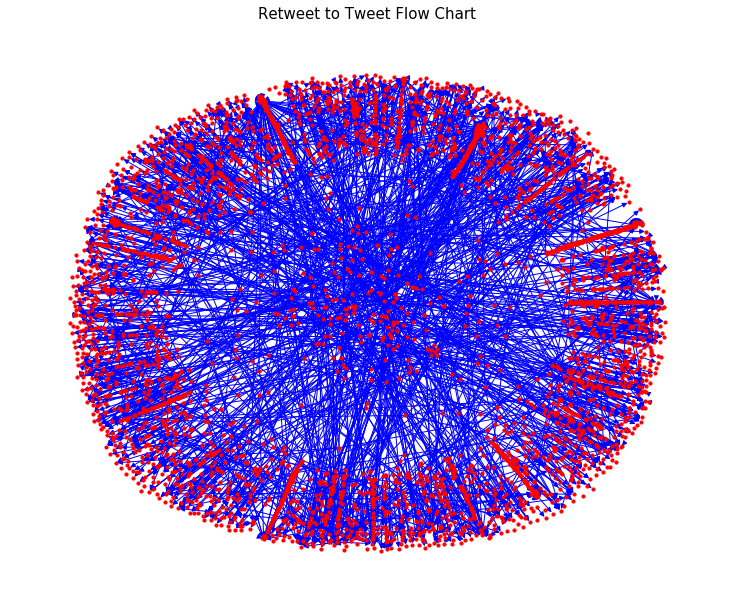

In [130]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    df,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(G_rt, node_size=10, edge_color='blue', node_color='red')
plt.title('Retweet to Tweet Flow Chart', size=15)
plt.show()

In [131]:
graph_centrality = nx.degree_centrality(G_rt)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Ooranjan', 0.04300822561692127),
 ('IsChinar', 0.039247943595769684),
 ('howroute', 0.036897767332549944),
 ('globaltimesnews', 0.02608695652173913),
 ('ANI', 0.02561692126909518)]

In [132]:
graph_closeness = nx.closeness_centrality(G_rt)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[('Ooranjan', 0.04253819036427732),
 ('IsChinar', 0.03882570853830986),
 ('howroute', 0.03619271445358402),
 ('globaltimesnews', 0.02563531395289429),
 ('DrEricDing', 0.025228160123536642)]

In [133]:
graph_betweenness = nx.betweenness_centrality(G_rt, normalized=True, endpoints=False)
sorted_bet=sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:50]

In [134]:
df['closeness'] = df['original_creator'].map(graph_closeness)
df['centrality'] = df['original_creator'].map(graph_centrality)
df['betweeness']=df['original_creator'].map(graph_betweenness)
df1 = df

In [135]:
followers = df['followers']
listed_count = df['listed_count']

In [136]:
cols = ['followers', 'listed_count']

for i in cols:
    df[i] = (df[i]-df[i].mean())/df[i].std()

In [137]:
followers_weight = df['followers'] * .5
listed_weight = df['listed_count'] * .3
ccb_weight = (df['closeness']+df['centrality']+df['closeness'])*.2

In [139]:
df1['score']=followers_weight+listed_weight+ccb_weight
top_50_score=df1.sort_values('score', ascending=False)
a=top_50_score.drop_duplicates(subset='user')
a['followers'] = followers
a['listed_count'] = listed_count

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [140]:
a.drop(['Unnamed: 0'],axis = 1, inplace = True)

Final DataFrame

In [143]:
a.sort_values(by = 'original_creator', ascending = False)

,user,original_creator,tweet,followers,created_at,listed_count,location,friends_count,tweet_final,closeness,centrality,betweeness,score
189,zwar_w,zwar_w,the Qantas #coronavirus flight to Darwin have...,-0.057546,2020-02-09 04:30:19,-0.127399,"Darwin, Northern Territory",1166.0,the Qantas #coronavirus flight to Darwin have...,0.000000,0.000470,0.0,-0.066899
3174,daaitoulaam,zinoviev1,The situation on Christmas Island is precario...,-0.051978,2020-02-09 04:20:21,0.126616,Hong Kong,3434.0,RT,0.000470,0.000940,0.0,0.012372
3547,StephMcLennan,zinoviev1,The situation on Christmas Island is precario...,-0.056564,2020-02-09 04:17:25,-0.132513,"Sydney, Australia",2043.0,RT,0.000470,0.000940,0.0,-0.067660
5895,zinoviev1,zinoviev1,The situation on Christmas Island is precario...,NaN,NaN,NaN,NaN,NaN,The situation on Christmas Island is precario...,0.000470,0.000940,0.0,NaN
3056,PoliticalTweetW,zeusFanHouse,Breaking!#Trump Calls 4 Investigation Of #Cor...,-0.049949,2020-02-09 04:21:25,-0.146151,"Mount Vernon, VA",4922.0,RT,0.001645,0.002115,0.0,-0.067739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,jeanettetanja,1Whatever_Works,Very scary RT @TellyGunge: Residents are weld...,-0.058696,2020-02-09 04:40:08,-0.146151,NaN,47.0,RT,0.000235,0.000705,0.0,-0.072958
567,1AbbasiH,1AbbasiH,Tottenham players think about walking off the...,-0.058693,2020-02-09 04:05:30,-0.144447,London,7.0,Tottenham players think about walking off the...,0.000235,0.000705,0.0,-0.072445
2966,Flipped54407650,1AbbasiH,Next time Tottenham players think about walki...,-0.058738,2020-02-09 04:22:06,-0.146151,"Sydney, New South Wales",50.0,RT,0.000235,0.000705,0.0,-0.072979
360,101stmonk3y,101stmonk3y,no need to test citizens evacuated from Wuhan...,-0.055487,2020-02-09 04:19:01,-0.083074,The Back of Tiamat,2395.0,no need to test citizens evacuated from Wuhan...,0.000000,0.000470,0.0,-0.052572


In [146]:
a[['user','original_creator','tweet_final']].sort_values(by = 'original_creator').to_csv('/Users/Aifaz/Desktop/tweets_arrows.csv')

# TOP INFLUENCERS

In [142]:
final_ans_df = df1.dropna().sort_values(by = 'score', ascending = False)
final_ans_df[['user','score']].drop_duplicates(subset = 'user')[:50]

,user,score
533,XHNews,25.801303
469,ndtv,24.418641
415,PDChina,14.491451
546,htTweets,14.172052
575,the_hindu,11.584309
580,IndiaToday,10.687692
198,evankirstel,7.404395
483,ANI,7.239306
73,airnewsalerts,4.620791
500,globaltimesnews,4.216573


# Filtering by betweenness to get better insights

In [68]:
a_list = []
for x in range(0,len(sorted_bet)): 
    b = str(sorted_bet[x][0])
    a_list.append(b)

In [69]:
def v(name): 
    if name in a_list: 
        return 1 
    return 0 

one_two = df['original_creator'].map(v)
df['top_50'] = one_two
top = df[df['top_50'] == 1]

In [70]:
non_duplicates = df['original_creator'].value_counts()
df3=df[df['original_creator'].isin(non_duplicates[non_duplicates].index)]

In [71]:
df3['original_creator'].value_counts().head(10)

howroute           210
Ooranjan           185
globaltimesnews    136
ANI                112
inteldotwav        110
DrMattMcCarthy      85
HawleyMO            81
XHNews              81
CGTNOfficial        78
livecrisisnews      70
jenniferatntd       68
IndoPac_Info        66
NorbertElekes       65
PDChina             62
happyintheair       57
kr3at               56
Rntk____            54
htommy998           53
DrEricDing          49
KTHopkins           46
Quresh_Moin         44
QuickTake           43
NCOVNEWS            42
famous9_vlogs       41
ACEL84              40
V2019N              38
NatShupe            35
badiucao            34
SecPompeo           28
PTI_News            28
PoliticalShort      28
WilliamYang120      26
MithriCastle        26
NetworksManager     24
Aryanwarlord        23
ImperiumKnights     23
ChrisDerps          22
sarahclarkehk       21
Wycked_Yum          21
benedictrogers      20
FemiOke             18
WarsontheBrink      18
GabbbarSingh        17
gruebelschn

Nodes in RT network: 1849
Edges in RT network: 2155


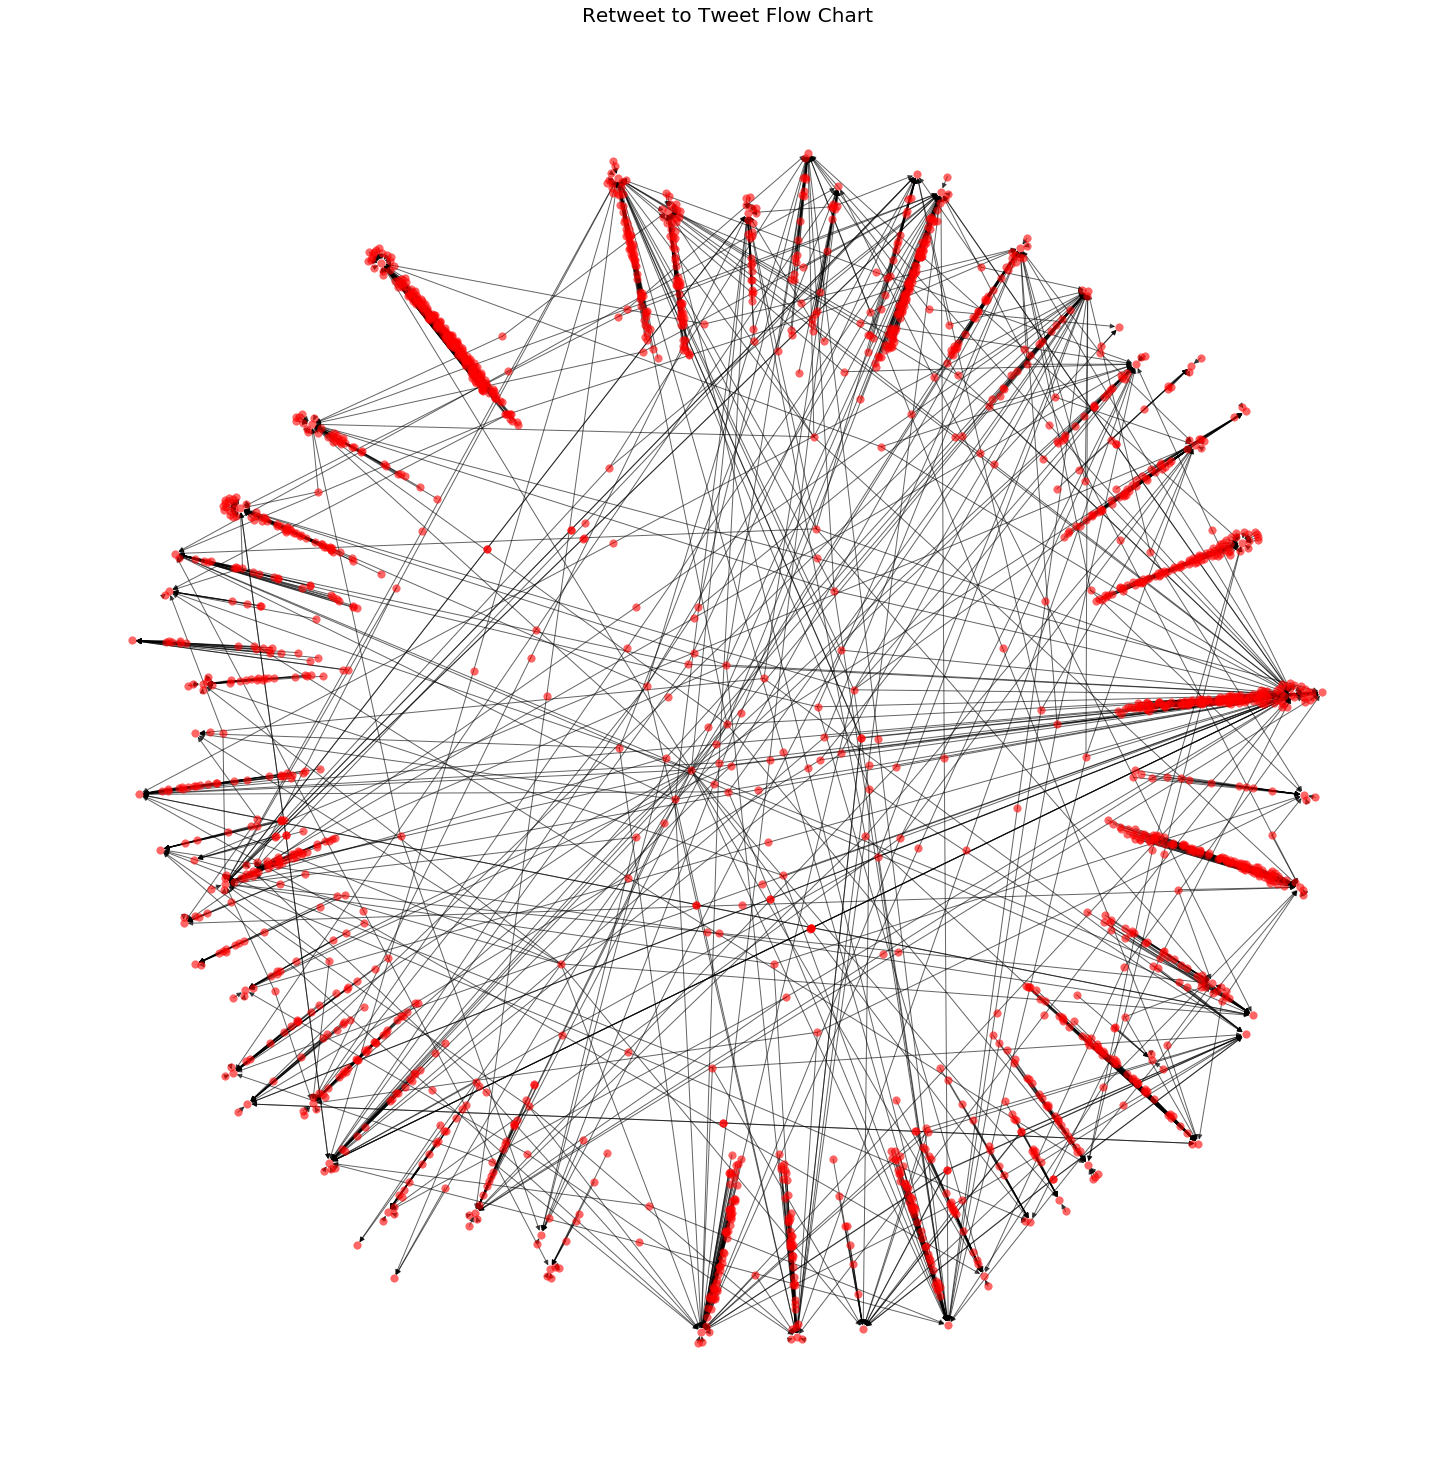

In [75]:
# Create retweet network from edgelist
G_rt1 = nx.from_pandas_edgelist(
    df3,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt1.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt1.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.title('Retweet to Tweet Flow Chart', size=20)
plt.show()

In [76]:
graph_centrality = nx.degree_centrality(G_rt1)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Ooranjan', 0.09902597402597403),
 ('howroute', 0.08495670995670995),
 ('globaltimesnews', 0.060064935064935064),
 ('ANI', 0.058982683982683984),
 ('inteldotwav', 0.04816017316017316)]

In [77]:
graph_closeness = nx.closeness_centrality(G_rt1)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[('Ooranjan', 0.09794372294372294),
 ('howroute', 0.08333333333333333),
 ('globaltimesnews', 0.058982683982683984),
 ('ANI', 0.057900432900432904),
 ('DrEricDing', 0.05755335529388008)]

In [78]:
graph_betweenness = nx.betweenness_centrality(G_rt1, normalized=True, endpoints=True)
sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

[('howroute', 8.984615528693409e-05),
 ('DrEricDing', 5.589777087884173e-05),
 ('Ooranjan', 5.297118601607515e-05),
 ('globaltimesnews', 3.189977500415575e-05),
 ('ANI', 3.131445803160243e-05)]